In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_datasets(filename):
    '''
    Читає вхідний файл
    
    Параметри:
    filename - шлях до вхідного файлу з даними
    
    Результат:
    X - набір характеристик
    y - набір передбачуваних величин
    '''
  
    df = pd.read_csv(filename, delimiter=',')
    X, y = df["A"], df["B"]
    return X, y

In [3]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [4]:
def plot_data(X_train, X_test, y_train, y_test):
    '''
    Функція для відображення розподілу тренувальних та тестових даних (для однієї змінної)
    '''
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [5]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик

    Результат:
    X_new - набір нормалізованих характеристик, (X-mean)/std
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    ##################
    # Заповнити змінні
    ##################
   
    #mean = [x/len(X) for x in X]
    # в даному випадку можна використати вбудовану функцыю оскільки маєм 1 характеристику
    #mean=X.mean()
    
    mean=np.sum(X,axis=0)/X.shape[0]
    print('mean')
    print(mean)
    #std = np.max(X, axis=0) - np.min(X, axis=0)
    std = X.std()
    print('std')
    print(std)
    X_new = (X - mean) / std
    return X_new, mean, std

In [6]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [7]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''
    ######################
    # Один рядок коду
    ######################
    h_thetha = np.dot(X, theta)   #тотожнє h_thetha = X.dot(theta);
    return h_thetha

In [29]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    ######################
    # 1-2 рядки коду  
    J = np.sum((hypothesis(X,theta) - y)**2)/(2*m);   
    ######################
    return J

In [43]:
def derivative(X, y, theta):
    m = X.shape[0]
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    d_thetha1 = np.dot(hypothesis(X,theta) - y, X) / m
    print(d_thetha1)
    ######################
    # 1 рядок коду
    ######################
    return d_thetha1

In [45]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    
    
    1) J_i (theta_0, theta_1)
    2)  theta_0 = theta_0 - alpha*dtheta_0
        theta_1 = theta_1 - alpha*dtheta_1
        |J_i-J_{i-1}| < eps || num_iters>10000000000 -> break
    3) goto 1
    '''
    m = X.shape[0]
    J_history = []
    J= cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
   
        
    for i in range(num_iters):
        ######################
        # Використати написані вище функції
        delta = derivative(X, y, theta)
        theta = theta - alpha*delta
        J_i = cost_function(X, y, theta)
        ######################
        if print_J == True:
            print(J)
        J_history.append(J)
        
    return theta, J_history


In [46]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [47]:
X, y = load_datasets('burrito.csv')
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97,), y=(97,)


Розбиття датасету на частини:

In [48]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77,), y=(77,)
Test set: X=(20,), y=(20,)


Відображення тренувальних і тестових даних на графіку (для 1 змінної)

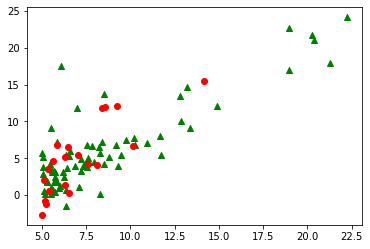

In [49]:
plot_data(X_train, X_test, y_train, y_test)

Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [50]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

mean
8.436532467532468
std
4.157457241747449


Для спрощення записів аліас для вектора передбачуваних значень

In [51]:
y = y_train[:]

У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [52]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
34.24431887585325
34.24431887585324
34.24431887585325


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [53]:
alpha = 0.01
num_iters = 1500
#точність
eps =0.00001

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: -3.63; Theta 1: 1.17

In [54]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

34.24431887585325
34.24431887585324
[-6.0767761  -4.75264977]
[-6.0767761  -4.75264977]
33.65213107605824
33.65213107605824
[-6.01600834 -4.7057405 ]
[-6.01600834 -4.7057405 ]
33.071670013724315
33.071670013724315
[-5.95584826 -4.65929423]
[-5.95584826 -4.65929423]
32.502703462127336
32.50270346212733
[-5.89628978 -4.61330639]
[-5.89628978 -4.61330639]
31.94500379355348
31.945003793553497
[-5.83732688 -4.56777246]
[-5.83732688 -4.56777246]
31.39834788821695
31.39834788821694
[-5.77895361 -4.52268795]
[-5.77895361 -4.52268795]
30.862517044981697
30.8625170449817
[-5.72116407 -4.47804844]
[-5.72116407 -4.47804844]
30.337296893851285
30.337296893851285
[-5.66395243 -4.43384952]
[-5.66395243 -4.43384952]
29.822477310192006
29.822477310192006
[-5.60731291 -4.39008685]
[-5.60731291 -4.39008685]
29.317852330654784
29.317852330654794
[-5.55123978 -4.34675612]
[-5.55123978 -4.34675612]
28.823220070762325
28.823220070762332
[-5.49572738 -4.30385307]
[-5.49572738 -4.30385307]
28.33838264412842
28

[-1.61257129 -1.2832204 ]
[-1.61257129 -1.2832204 ]
6.430366382335721
6.430366382335719
[-1.59644557 -1.27055485]
[-1.59644557 -1.27055485]
6.388944000524516
6.388944000524518
[-1.58048112 -1.25801431]
[-1.58048112 -1.25801431]
6.348341793244373
6.348341793244374
[-1.56467631 -1.24559755]
[-1.56467631 -1.24559755]
6.308543520164091
6.308543520164091
[-1.54902954 -1.23330334]
[-1.54902954 -1.23330334]
6.269533262541186
6.269533262541185
[-1.53353925 -1.22113047]
[-1.53353925 -1.22113047]
6.231295416853614
6.231295416853612
[-1.51820385 -1.20907776]
[-1.51820385 -1.20907776]
6.193814688557551
6.193814688557554
[-1.50302182 -1.197144  ]
[-1.50302182 -1.197144  ]
6.157076085968834
6.157076085968833
[-1.4879916  -1.18532803]
[-1.4879916  -1.18532803]
6.121064914265542
6.121064914265545
[-1.47311168 -1.17362869]
[-1.47311168 -1.17362869]
6.085766769609364
6.085766769609368
[-1.45838057 -1.16204483]
[-1.45838057 -1.16204483]
6.0511675333833725
6.051167533383369
[-1.44379676 -1.15057529]
[-1.4

4.473414712321516
4.473414712321517
[-0.40288006 -0.32645226]
[-0.40288006 -0.32645226]
4.470739253075945
4.470739253075942
[-0.39885126 -0.32323013]
[-0.39885126 -0.32323013]
4.46811676276397
4.468116762763973
[-0.39486275 -0.32003981]
[-0.39486275 -0.32003981]
4.465546192660521
4.465546192660521
[-0.39091412 -0.31688097]
[-0.39091412 -0.31688097]
4.463026514804936
4.463026514804938
[-0.38700498 -0.31375332]
[-0.38700498 -0.31375332]
4.460556721589812
4.460556721589813
[-0.38313493 -0.31065653]
[-0.38313493 -0.31065653]
4.458135825358017
4.458135825358016
[-0.37930358 -0.30759031]
[-0.37930358 -0.30759031]
4.45576285800764
4.455762858007639
[-0.37551055 -0.30455435]
[-0.37551055 -0.30455435]
4.453436870604814
4.453436870604813
[-0.37175544 -0.30154836]
[-0.37175544 -0.30154836]
4.451156933004166
4.4511569330041665
[-0.36803789 -0.29857204]
[-0.36803789 -0.29857204]
4.448922133476805
4.4489221334768025
[-0.36435751 -0.2956251 ]
[-0.36435751 -0.2956251 ]
4.446731578345669
4.446731578345

4.348725999480259
4.348725999480257
[-0.11129629 -0.09170995]
[-0.11129629 -0.09170995]
4.34851905810298
4.348519058102979
[-0.11018333 -0.09080476]
[-0.11018333 -0.09080476]
4.348316213336875
4.348316213336874
[-0.10908149 -0.08990851]
[-0.10908149 -0.08990851]
4.3481173840821405
4.348117384082143
[-0.10799068 -0.0890211 ]
[-0.10799068 -0.0890211 ]
4.347922490844555
4.347922490844555
[-0.10691077 -0.08814245]
[-0.10691077 -0.08814245]
4.34773145570369
4.3477314557036895
[-0.10584166 -0.08727247]
[-0.10584166 -0.08727247]
4.347544202281752
4.347544202281752
[-0.10478325 -0.08641108]
[-0.10478325 -0.08641108]
4.347360655713039
4.347360655713039
[-0.10373541 -0.08555819]
[-0.10373541 -0.08555819]
4.347180742614011
4.347180742614012
[-0.10269806 -0.08471372]
[-0.10269806 -0.08471372]
4.347004391053936
4.347004391053937
[-0.10167108 -0.08387759]
[-0.10167108 -0.08387759]
4.346831530526135
4.346831530526134
[-0.10065437 -0.08304971]
[-0.10065437 -0.08304971]
4.34666209191978
4.3466620919197

[-0.03013394 -0.02525792]
[-0.03013394 -0.02525792]
4.339033698499038
4.339033698499038
[-0.0298326  -0.02500862]
[-0.0298326  -0.02500862]
4.339018619709046
4.339018619709046
[-0.02953428 -0.02476178]
[-0.02953428 -0.02476178]
4.339003839386557
4.339003839386555
[-0.02923894 -0.02451738]
[-0.02923894 -0.02451738]
4.338989351623502
4.3389893516235025
[-0.02894655 -0.02427539]
[-0.02894655 -0.02427539]
4.338975150628769
4.338975150628768
[-0.02865708 -0.02403579]
[-0.02865708 -0.02403579]
4.338961230725879
4.338961230725881
[-0.02837051 -0.02379855]
[-0.02837051 -0.02379855]
4.338947586350729
4.338947586350729
[-0.02808681 -0.02356366]
[-0.02808681 -0.02356366]
4.338934212049354
4.338934212049352
[-0.02780594 -0.02333108]
[-0.02780594 -0.02333108]
4.338921102475753
4.338921102475754
[-0.02752788 -0.0231008 ]
[-0.02752788 -0.0231008 ]
4.3389082523897535
4.338908252389756
[-0.0272526  -0.02287279]
[-0.0272526  -0.02287279]
4.338895656654913
4.338895656654913
[-0.02698007 -0.02264704]
[-0.

4.338330840276318
4.338330840276318
[-0.00824131 -0.00702565]
[-0.00824131 -0.00702565]
4.33832967331916
4.3383296733191585
[-0.00815889 -0.00695631]
[-0.00815889 -0.00695631]
4.338328529458142
4.338328529458144
[-0.0080773  -0.00688765]
[-0.0080773  -0.00688765]
4.338327408236135
4.338327408236135
[-0.00799653 -0.00681966]
[-0.00799653 -0.00681966]
4.33832630920505
4.338326309205048
[-0.00791657 -0.00675235]
[-0.00791657 -0.00675235]
4.338325231925674
4.3383252319256735
[-0.0078374  -0.00668571]
[-0.0078374  -0.00668571]
4.338324175967487
4.338324175967489
[-0.00775903 -0.00661972]
[-0.00775903 -0.00661972]
4.338323140908487
4.338323140908486
[-0.00768144 -0.00655438]
[-0.00768144 -0.00655438]
4.3383221263350285
4.33832212633503
[-0.00760462 -0.00648969]
[-0.00760462 -0.00648969]
4.338321131841652
4.338321131841655
[-0.00752858 -0.00642563]
[-0.00752858 -0.00642563]
4.338320157030924
4.338320157030923
[-0.00745329 -0.00636221]
[-0.00745329 -0.00636221]
4.338319201513273
4.338319201513

4.33827662728757
4.33827662728757
[-0.0023229  -0.00201326]
[-0.0023229  -0.00201326]
4.3382765332667255
4.338276533266726
[-0.00229967 -0.00199338]
[-0.00229967 -0.00199338]
4.338276441106524
4.338276441106523
[-0.00227667 -0.00197371]
[-0.00227667 -0.00197371]
4.338276350770141
4.338276350770143
[-0.00225391 -0.00195423]
[-0.00225391 -0.00195423]
4.338276262221484
4.338276262221485
[-0.00223137 -0.00193494]
[-0.00223137 -0.00193494]
4.338276175425174
4.338276175425174
[-0.00220906 -0.00191584]
[-0.00220906 -0.00191584]
4.338276090346529
4.338276090346528
[-0.00218696 -0.00189693]
[-0.00218696 -0.00189693]
4.338276006951557
4.338276006951558
[-0.0021651  -0.00187821]
[-0.0021651  -0.00187821]
4.338275925206937
4.3382759252069345
[-0.00214344 -0.00185967]
[-0.00214344 -0.00185967]
4.33827584508001
4.338275845080009
[-0.00212201 -0.00184132]
[-0.00212201 -0.00184132]
4.338275766538757
4.338275766538757
[-0.00210079 -0.00182314]
[-0.00210079 -0.00182314]
4.338275689551799
4.3382756895517

[-0.00063529 -0.00056   ]
[-0.00063529 -0.00056   ]
4.33827222961079
4.33827222961079
[-0.00062894 -0.00055447]
[-0.00062894 -0.00055447]
4.338272222615745
4.338272222615744
[-0.00062265 -0.000549  ]
[-0.00062265 -0.000549  ]
4.338272215759115
4.338272215759117
[-0.00061642 -0.00054358]
[-0.00061642 -0.00054358]
4.338272209038161
4.338272209038161
[-0.00061026 -0.00053822]
[-0.00061026 -0.00053822]
4.338272202450199
4.3382722024502
[-0.00060415 -0.0005329 ]
[-0.00060415 -0.0005329 ]
4.338272195992596
4.338272195992596
[-0.00059811 -0.00052764]
[-0.00059811 -0.00052764]
4.3382721896627725
4.338272189662772
[-0.00059213 -0.00052244]
[-0.00059213 -0.00052244]
4.338272183458201
4.338272183458199
[-0.00058621 -0.00051728]
[-0.00058621 -0.00051728]
4.338272177376399
4.338272177376401
[-0.00058035 -0.00051217]
[-0.00058035 -0.00051217]
4.3382721714149435
4.3382721714149435
[-0.00057454 -0.00050712]
[-0.00057454 -0.00050712]
4.338272165571447
4.338272165571446
[-0.0005688  -0.00050211]
[-0.000

[-0.00017029 -0.00015271]
[-0.00017029 -0.00015271]
4.338271901879946
4.338271901879946
[-0.00016858 -0.0001512 ]
[-0.00016858 -0.0001512 ]
4.338271901369674
4.338271901369674
[-0.0001669  -0.00014971]
[-0.0001669  -0.00014971]
4.338271900869496
4.338271900869496
[-0.00016523 -0.00014823]
[-0.00016523 -0.00014823]
4.338271900379216
4.338271900379216
[-0.00016358 -0.00014677]
[-0.00016358 -0.00014677]
4.338271899898635
4.338271899898635
[-0.00016194 -0.00014532]
[-0.00016194 -0.00014532]
4.338271899427563
4.338271899427561
[-0.00016032 -0.00014388]
[-0.00016032 -0.00014388]
4.338271898965812
4.33827189896581
[-0.00015872 -0.00014246]
[-0.00015872 -0.00014246]
4.338271898513197
4.338271898513196
[-0.00015713 -0.00014106]
[-0.00015713 -0.00014106]
4.338271898069538
4.338271898069537
[-0.00015556 -0.00013967]
[-0.00015556 -0.00013967]
4.338271897634654
4.338271897634653
[-0.000154   -0.00013829]
[-0.000154   -0.00013829]
4.338271897208375
4.338271897208376
[-0.00015246 -0.00013692]
[-0.000

[-4.65716155e-05 -4.24766456e-05]
[-4.65716155e-05 -4.24766456e-05]
4.338271878047374
4.338271878047376
[-4.61058994e-05 -4.20573955e-05]
[-4.61058994e-05 -4.20573955e-05]
4.338271878008623
4.338271878008625
[-4.56448404e-05 -4.16422836e-05]
[-4.56448404e-05 -4.16422836e-05]
4.338271877970638
4.338271877970638
[-4.51883920e-05 -4.12312688e-05]
[-4.51883920e-05 -4.12312688e-05]
4.338271877933404
4.338271877933405
[-4.47365081e-05 -4.08243109e-05]
[-4.47365081e-05 -4.08243109e-05]
4.338271877896906
4.338271877896906
[-4.42891430e-05 -4.04213696e-05]
[-4.42891430e-05 -4.04213696e-05]
4.338271877861131
4.338271877861131
[-4.38462516e-05 -4.00224054e-05]
[-4.38462516e-05 -4.00224054e-05]
4.338271877826064
4.338271877826063
[-4.34077890e-05 -3.96273791e-05]
[-4.34077890e-05 -3.96273791e-05]
4.338271877791689
4.338271877791689
[-4.29737112e-05 -3.92362517e-05]
[-4.29737112e-05 -3.92362517e-05]
4.338271877757995
4.338271877757995
[-4.25439740e-05 -3.88489848e-05]
[-4.25439740e-05 -3.88489848e-

[-1.32593010e-05 -1.22933577e-05]
[-1.32593010e-05 -1.22933577e-05]
4.338271876249658
4.3382718762496575
[-1.31267079e-05 -1.21720207e-05]
[-1.31267079e-05 -1.21720207e-05]
4.33827187624647
4.338271876246469
[-1.29954409e-05 -1.20518813e-05]
[-1.29954409e-05 -1.20518813e-05]
4.338271876243344
4.338271876243344
[-1.28654865e-05 -1.19329276e-05]
[-1.28654865e-05 -1.19329276e-05]
4.33827187624028
4.338271876240282
[-1.27368316e-05 -1.18151481e-05]
[-1.27368316e-05 -1.18151481e-05]
4.338271876237278
4.338271876237278
[-1.26094633e-05 -1.16985311e-05]
[-1.26094633e-05 -1.16985311e-05]
4.338271876234333
4.338271876234333
[-1.24833686e-05 -1.15830650e-05]
[-1.24833686e-05 -1.15830650e-05]
4.338271876231447
4.338271876231447
[-1.23585350e-05 -1.14687387e-05]
[-1.23585350e-05 -1.14687387e-05]
4.338271876228618
4.33827187622862
[-1.22349496e-05 -1.13555407e-05]
[-1.22349496e-05 -1.13555407e-05]
4.338271876225845
4.338271876225846
[-1.21126001e-05 -1.12434601e-05]
[-1.21126001e-05 -1.12434601e-05

[-3.73727579e-06 -3.52275945e-06]
[-3.73727579e-06 -3.52275945e-06]
4.338271876101456
4.338271876101457
[-3.69990303e-06 -3.48798936e-06]
[-3.69990303e-06 -3.48798936e-06]
4.3382718761012
4.338271876101201
[-3.66290400e-06 -3.45356245e-06]
[-3.66290400e-06 -3.45356245e-06]
4.338271876100948
4.338271876100947
[-3.62627496e-06 -3.41947534e-06]
[-3.62627496e-06 -3.41947534e-06]
4.338271876100701
4.338271876100699
[-3.59001221e-06 -3.38572468e-06]
[-3.59001221e-06 -3.38572468e-06]
4.338271876100459
4.338271876100458
[-3.55411209e-06 -3.35230713e-06]
[-3.55411209e-06 -3.35230713e-06]
4.338271876100221
4.338271876100221
[-3.51857097e-06 -3.31921943e-06]
[-3.51857097e-06 -3.31921943e-06]
4.338271876099987
4.338271876099985
[-3.48338526e-06 -3.28645830e-06]
[-3.48338526e-06 -3.28645830e-06]
4.338271876099758
4.33827187609976
[-3.44855141e-06 -3.25402053e-06]
[-3.44855141e-06 -3.25402053e-06]
4.338271876099536
4.3382718760995385
[-3.41406589e-06 -3.22190292e-06]
[-3.41406589e-06 -3.22190292e-06

Відображення штрафної функції як функції від thetha0, thetha1.

391.8807521584311
391.8807521584311
390.424245946715
390.42424594671496
388.9903984353435
388.9903984353435
387.57920962431683
387.5792096243169
386.19067951363456
386.1906795136345
384.824808103297
384.82480810329696
383.48159539330425
383.4815953933042
382.161041383656
382.16104138365614
380.8631460743526
380.86314607435236
379.5879094653936
379.5879094653937
378.3353315567793
378.3353315567793
377.1054123485098
377.1054123485098
375.8981518405849
375.89815184058483
374.7135500330045
374.7135500330044
373.55160692576874
373.5516069257687
372.4123225188779
372.4123225188779
371.2956968123315
371.2956968123314
370.20172980612983
370.20172980612983
369.1304215002728
369.13042150027286
368.08177189476044
368.0817718947604
367.05578098959273
367.05578098959296
366.0524487847696
366.05244878476964
365.07177528029115
365.0717752802911
364.1137604761574
364.11376047615744
363.1784043723683
363.1784043723683
362.2657069689237
362.2657069689238
361.3756682658239
361.37566826582395
360.50828826

328.78997241782736
328.78997241782736
327.96790981576146
327.9679098157615
327.1685059140402
327.1685059140401
326.39176071266365
326.3917607126637
325.63767421163175
325.63767421163175
324.9062464109445
324.90624641094433
324.19747731060187
324.19747731060176
323.51136691060384
323.51136691060384
322.8479152109505
322.8479152109504
322.2071222116418
322.2071222116417
321.5889879126778
321.58898791267785
320.9935123140584
320.99351231405836
320.42069541578377
320.42069541578377
319.87053721785367
319.8705372178537
319.3430377202682
319.3430377202683
318.83819692302745
318.83819692302757
318.3560148261314
318.3560148261314
317.89649142957984
317.89649142957967
317.45962673337306
317.45962673337317
317.0454207375108
317.04542073751077
316.65387344199337
316.65387344199337
316.2849848468206
316.2849848468205
315.93875495199234
315.93875495199234
315.61518375750876
315.6151837575087
315.3142712633699
315.31427126336985
315.03601746957554
315.0360174695754
314.780422376126
314.7804223761259

291.01633870582697
291.01633870582697
290.46618050789687
290.46618050789687
289.9386810103115
289.93868101031154
289.4338402130707
289.43384021307077
288.9516581161746
288.9516581161745
288.49213471962315
288.4921347196231
288.05527002341626
288.0552700234163
287.6410640275542
287.6410640275542
287.2495167320366
287.24951673203657
286.8806281368638
286.8806281368637
286.5343982420355
286.5343982420356
286.21082704755196
286.21082704755213
285.9099145534131
285.9099145534132
285.63166075961874
285.63166075961874
285.37606566616915
285.3760656661691
285.1431292730643
285.14312927306435
284.9328515803039
284.93285158030403
284.74523258788827
284.74523258788827
284.5802722958172
284.5802722958173
284.43797070409096
284.4379707040909
284.3183278127092
284.3183278127091
284.22134362167213
284.22134362167213
284.14701813097975
284.1470181309798
284.09535134063196
284.0953513406319
284.06634325062885
284.06634325062885
284.05999386097034
284.0599938609704
284.0763031716566
284.0763031716566
28

270.62843422872226
270.6284342287222
269.8290303270009
269.8290303270008
269.05228512562445
269.0522851256243
268.29819862459254
268.29819862459254
267.56677082390513
267.5667708239051
266.85800172356255
266.8580017235626
266.1718913235646
266.1718913235646
265.5084396239112
265.5084396239112
264.86764662460257
264.86764662460257
264.2495123256386
264.2495123256385
263.6540367270192
263.6540367270191
263.0812198287445
263.08121982874457
262.5310616308144
262.53106163081446
262.0035621332289
262.0035621332289
261.4987213359882
261.4987213359882
261.0165392390921
261.016539239092
260.55701584254064
260.5570158425407
260.12015114633385
260.1201511463339
259.7059451504717
259.70594515047156
259.3143978549541
259.3143978549541
258.94550925978126
258.94550925978126
258.59927936495296
258.599279364953
258.27570817046944
258.27570817046933
257.9747956763306
257.9747956763305
257.69654188253634
257.69654188253617
257.44094678908675
257.4409467890867
257.20801039598166
257.2080103959817
256.9977

250.39282410621274
250.39282410621274
249.434809302079
249.43480930207892
248.4994531982898
248.4994531982898
247.58675579484535
247.58675579484535
246.6967170917455
246.6967170917455
245.82933708899026
245.8293370889904
244.98461578657987
244.98461578657987
244.16255318451394
244.16255318451394
243.3631492827927
243.36314928279265
242.5864040814161
242.5864040814162
241.83231758038414
241.8323175803842
241.10088977969693
241.10088977969681
240.39212067935432
240.39212067935424
239.7060102793563
239.70601027935632
239.04255857970296
239.042558579703
238.40176558039428
238.40176558039423
237.7836312814303
237.78363128143033
237.18815568281087
237.18815568281084
236.61533878453616
236.6153387845361
236.0651805866061
236.0651805866061
235.53768108902065
235.5376810890206
235.03284029177993
235.03284029177993
234.55065819488385
234.55065819488385
234.09113479833238
234.09113479833238
233.6542701021255
233.65427010212557
233.24006410626336
233.24006410626336
232.84851681074576
232.848516810

223.5028099869557
223.5028099869557
222.59011258351117
222.59011258351117
221.7000738804114
221.70007388041145
220.83269387765617
220.83269387765617
219.9879725752456
219.98797257524564
219.16590997317977
219.16590997317982
218.36650607145853
218.3665060714586
217.589760870082
217.589760870082
216.83567436905008
216.83567436905014
216.1042465683627
216.10424656836275
215.39547746802012
215.39547746802012
214.7093670680222
214.70936706802212
214.04591536836884
214.0459153683688
213.40512236906014
213.40512236906014
212.78698807009613
212.78698807009613
212.19151247147676
212.19151247147676
211.61869557320202
211.61869557320202
211.06853737527194
211.06853737527194
210.54103787768653
210.5410378776865
210.03619708044573
210.03619708044576
209.55401498354962
209.55401498354956
209.09449158699817
209.09449158699812
208.6576268907914
208.6576268907914
208.24342089492922
208.24342089492924
207.85187359941168
207.85187359941182
207.48298500423886
207.4829850042389
207.13675510941061
207.13675

211.51055026913204
211.51055026913207
210.3486071618964
210.34860716189633
209.2093227550054
209.20932275500533
208.09269704845903
208.09269704845897
206.99873004225736
206.9987300422573
205.9274217364003
205.9274217364003
204.87877213088788
204.87877213088788
203.85278122572015
203.85278122572018
202.8494490208971
202.8494490208971
201.86877551641868
201.86877551641862
200.91076071228488
200.91076071228483
199.9754046084957
199.97540460849575
199.06270720505128
199.0627072050513
198.17266850195142
198.1726685019514
197.30528849919622
197.30528849919622
196.46056719678572
196.4605671967857
195.63850459471982
195.63850459471982
194.83910069299858
194.83910069299856
194.06235549162201
194.062355491622
193.3082689905901
193.30826899059005
192.5768411899028
192.5768411899029
191.8680720895602
191.8680720895603
191.18196168956226
191.18196168956223
190.5185099899089
190.51850998990892
189.8777169906002
189.87771699060013
189.25958269163618
189.25958269163615
188.66410709301684
188.664107093

178.85259316669917
178.85259316669922
177.91723706291003
177.91723706290998
177.00453965946556
177.00453965946554
176.1145009563657
176.11450095636565
175.24712095361053
175.2471209536105
174.40239965120003
174.40239965120008
173.58033704913413
173.58033704913413
172.78093314741292
172.78093314741287
172.00418794603632
172.0041879460363
171.2501014450044
171.2501014450044
170.51867364431712
170.51867364431712
169.80990454397445
169.80990454397445
169.1237941439765
169.12379414397645
168.46034244432323
168.46034244432323
167.81954944501453
167.8195494450145
167.2014151460505
167.20141514605055
166.6059395474311
166.60593954743112
166.0331226491564
166.0331226491564
165.4829644512263
165.48296445122628
164.9554649536409
164.95546495364093
164.45062415640012
164.45062415640015
163.968442059504
163.96844205950399
163.50891866295254
163.50891866295254
163.07205396674573
163.07205396674576
162.65784797088355
162.65784797088358
162.26630067536604
162.26630067536604
161.89741208019316
161.8974

168.86345301083475
168.86345301083475
167.70150990359915
167.70150990359915
166.56222549670812
166.56222549670815
165.4455997901618
165.4455997901618
164.35163278396007
164.35163278396018
163.28032447810307
163.28032447810307
162.23167487259067
162.23167487259067
161.2056839674229
161.2056839674229
160.20235176259985
160.20235176259982
159.2216782581214
159.22167825812144
158.26366345398762
158.26366345398765
157.3283073501985
157.32830735019846
156.41560994675402
156.41560994675402
155.52557124365418
155.52557124365416
154.65819124089896
154.658191240899
153.81346993848845
153.8134699384885
152.99140733642258
152.99140733642258
152.19200343470135
152.1920034347014
151.41525823332475
151.4152582333247
150.66117173229287
150.66117173229284
149.92974393160554
149.9297439316056
149.22097483126296
149.22097483126296
148.53486443126496
148.53486443126496
147.87141273161166
147.87141273161168
147.230619732303
147.23061973230296
146.61248543333897
146.61248543333895
146.01700983471957
146.017

127.2693241412476
127.2693241412476
127.55753785606964
127.55753785606966
127.86841027123627
127.86841027123623
128.20194138674762
128.2019413867476
128.55813120260356
128.55813120260356
128.93697971880417
128.9369797188042
129.33848693534938
129.33848693534944
129.76265285223934
129.76265285223934
130.20947746947388
130.2094774694739
130.67896078705311
130.67896078705311
131.17110280497698
131.17110280497695
131.6859035232455
131.68590352324546
132.22336294185862
132.22336294185865
132.78348106081646
132.78348106081643
133.36625788011895
133.3662578801189
133.97169339976608
133.97169339976614
134.59978761975782
134.5997876197578
135.25054054009425
135.2505405400942
135.92395216077531
135.9239521607753
136.62002248180107
136.62002248180104
137.33875150317138
137.33875150317135
138.08013922488644
138.0801392248864
138.8441856469461
138.8441856469461
166.910963256424
166.910963256424
165.4544570447079
165.45445704470785
164.02060953333645
164.02060953333648
162.6094207223096
162.60942072

146.3701554863733
146.37015548637333
144.9589666753465
144.95896667534652
143.57043656466436
143.5704365646644
142.20456515432684
142.20456515432684
140.861352444334
140.86135244433396
139.5407984346858
139.54079843468585
138.24290312538224
138.24290312538224
136.96766651642335
136.9676665164233
135.7150886078091
135.71508860780915
134.48516939953953
134.48516939953953
133.27790889161454
133.2779088916146
132.0933070840343
132.09330708403434
130.93136397679865
130.93136397679865
129.79207956990766
129.79207956990766
128.67545386336133
128.6754538633613
127.58148685715965
127.58148685715965
126.51017855130259
126.51017855130262
125.46152894579018
125.4615289457902
124.43553804062248
124.43553804062246
123.43220583579937
123.43220583579937
122.45153233132095
122.45153233132095
121.49351752718715
121.49351752718712
120.558161423398
120.55816142339802
119.64546401995354
119.64546401995358
118.75542531685367
118.75542531685367
117.88804531409853
117.8880453140985
117.043324011688
117.043324

126.0233489402379
126.02334894023795
124.68013623024507
124.68013623024507
123.35958222059686
123.35958222059689
122.06168691129331
122.06168691129332
120.78645030233443
120.7864503023344
119.53387239372013
119.53387239372016
118.30395318545054
118.30395318545054
117.09669267752561
117.0966926775256
115.91209086994536
115.91209086994537
114.75014776270969
114.75014776270966
113.61086335581871
113.61086335581874
112.49423764927236
112.49423764927236
111.4002706430707
111.4002706430707
110.32896233721362
110.32896233721361
109.28031273170124
109.28031273170124
108.25432182653354
108.2543218265335
107.2509896217104
107.25098962171037
106.27031611723199
106.27031611723197
105.3123013130982
105.31230131309822
104.37694520930907
104.37694520930903
103.46424780586459
103.46424780586463
102.57420910276475
102.57420910276475
101.70682910000959
101.70682910000959
100.86210779759904
100.86210779759904
100.04004519553317
100.04004519553317
99.24064129381195
99.2406412938119
98.46389609243535
98.46

112.67724196936065
112.67724196936065
111.31137055902319
111.31137055902317
109.9681578490303
109.96815784903033
108.64760383938211
108.64760383938207
107.34970853007857
107.34970853007857
106.07447192111967
106.07447192111967
104.82189401250544
104.82189401250541
103.59197480423585
103.59197480423585
102.3847142963109
102.3847142963109
101.20011248873061
101.2001124887306
100.03816938149497
100.03816938149495
98.89888497460396
98.89888497460392
97.78225926805763
97.78225926805764
96.68829226185593
96.68829226185598
95.6169839559989
95.6169839559989
94.56833435048651
94.56833435048652
93.54234344531876
93.54234344531878
92.5390112404957
92.53901124049568
91.55833773601725
91.55833773601725
90.60032293188348
90.60032293188348
89.66496682809432
89.66496682809432
88.75226942464985
88.75226942464985
87.86223072155003
87.86223072155008
86.99485071879484
86.99485071879486
86.15012941638433
86.15012941638433
85.32806681431842
85.32806681431849
84.52866291259718
84.52866291259721
83.7519177112

78.31559718767672
78.31559718767673
77.35758238354289
77.3575823835429
76.42222627975377
76.42222627975374
75.5095288763093
75.5095288763093
74.61949017320947
74.61949017320946
73.75211017045429
73.7521101704543
72.90738886804375
72.90738886804377
72.08532626597786
72.08532626597786
71.28592236425666
71.28592236425668
70.50917716288006
70.50917716288008
69.75509066184814
69.75509066184814
69.02366286116087
69.02366286116086
68.31489376081822
68.31489376081822
67.62878336082028
67.62878336082028
66.96533166116693
66.96533166116696
66.32453866185827
66.32453866185827
65.70640436289425
65.70640436289425
65.11092876427486
65.1109287642749
64.53811186600015
64.53811186600016
63.98795366807006
63.98795366807006
63.46045417048463
63.46045417048463
62.955613373243885
62.955613373243885
62.473431276347775
62.473431276347746
62.0139078797963
62.01390787979631
61.577043183589495
61.577043183589495
61.162837187727334
61.16283718772732
60.77128989220979
60.77128989220978
60.40240129703694
60.402401

73.88264171079706
73.88264171079703
72.76601600425073
72.76601600425074
71.67204899804905
71.67204899804904
70.600740692192
70.60074069219198
69.55209108667962
69.55209108667962
68.52610018151188
68.52610018151188
67.5227679766888
67.5227679766888
66.54209447221037
66.5420944722104
65.58407966807658
65.58407966807658
64.64872356428745
64.64872356428745
63.736026160842954
63.73602616084297
62.84598745774312
62.84598745774312
61.97860745498794
61.97860745498794
61.13388615257742
61.13388615257741
60.31182355051153
60.311823550511534
59.5124196487903
59.5124196487903
58.73567444741374
58.735674447413714
57.981587946381794
57.981587946381794
57.250160145694515
57.250160145694515
56.541391045351894
56.54139104535188
55.85528064535393
55.85528064535393
55.1918289457006
55.1918289457006
54.551035946391934
54.551035946391934
53.932901647427904
53.932901647427904
53.33742604880853
53.33742604880853
52.7646091505338
52.7646091505338
52.21445095260374
52.21445095260375
51.686951455018324
51.68695

78.74526393364374
78.74526393364371
77.3567338229616
77.3567338229616
75.99086241262412
75.99086241262407
74.64764970263126
74.64764970263126
73.32709569298306
73.32709569298308
72.02920038367954
72.02920038367955
70.75396377472066
70.75396377472063
69.50138586610639
69.50138586610639
68.27146665783678
68.27146665783678
67.06420614991185
67.06420614991185
65.87960434233156
65.87960434233155
64.71766123509592
64.71766123509592
63.578376828204924
63.578376828204924
62.461751121658594
62.46175112165858
61.36778411545691
61.36778411545691
60.29647580959986
60.29647580959986
59.247826204087474
59.24782620408746
58.221835298919736
58.22183529891977
57.21850309409665
57.21850309409664
56.23782958961821
56.2378295896182
55.27981478548443
55.27981478548442
54.34445868169529
54.34445868169529
53.43176127825081
53.43176127825081
52.54172257515098
52.54172257515098
51.6743425723958
51.674342572395794
50.829621269985275
50.829621269985275
50.00755866791939
50.00755866791937
49.20815476619816
49.208

39.123135091670605
39.12313509167061
39.796546712351685
39.7965467123517
40.4926170333774
40.492617033377385
41.21134605474777
41.211346054747786
41.9527337764628
41.952733776462814
42.716780198522464
42.716780198522464
74.21177941804014
74.21177941804017
72.75527320632406
72.75527320632406
71.3214256949526
71.32142569495257
69.91023688392578
69.91023688392578
68.52170677324362
68.52170677324365
67.15583536290615
67.15583536290612
65.8126226529133
65.81262265291332
64.49206864326509
64.49206864326507
63.19417333396156
63.194173333961544
61.918936725002645
61.918936725002645
60.6663588163884
60.66635881638843
59.43643960811881
59.4364396081188
58.229179100193875
58.22917910019386
57.04457729261358
57.04457729261359
55.88263418537796
55.88263418537797
54.743349778486966
54.74334977848695
53.62672407194061
53.626724071940615
52.53275706573892
52.53275706573891
51.46144875988188
51.46144875988188
50.412799154369495
50.41279915436948
49.386808249201756
49.38680824920174
48.38347604437868
48

24.95403910924537
24.95403910924537
25.355546325790634
25.355546325790645
25.77971224268055
25.779712242680546
26.226536859915107
26.22653685991511
26.696020177494326
26.696020177494333
27.188162195418187
27.188162195418194
27.702962913686708
27.7029629136867
28.24042233229987
28.240422332299865
28.800540451257678
28.800540451257678
29.38331727056016
29.38331727056016
29.98875279020727
29.988752790207275
30.616847010199038
30.61684701019905
31.267599930535447
31.267599930535447
31.941011551216523
31.941011551216523
32.63708187224225
32.63708187224226
33.35581089361262
33.355810893612606
34.09719861532765
34.09719861532762
34.861245037387306
34.86124503738732
66.84599020119639
66.84599020119637
65.3894839894803
65.38948398948031
63.95563647810882
63.955636478108836
62.54444766708203
62.54444766708204
61.155917556399885
61.15591755639989
59.790046146062394
59.790046146062394
58.446833436069525
58.44683343606953
57.126279426421334
57.12627942642133
55.8283841171178
55.828384117117785
54.5

16.39163487481779
16.391634874817793
16.6345311889505
16.634531188950508
16.900086203427854
16.900086203427854
17.18829991824986
17.18829991824986
17.499172333416517
17.499172333416524
17.83270344892783
17.83270344892782
18.18889326478379
18.18889326478379
18.567741780984395
18.567741780984402
18.969248997529657
18.96924899752965
19.39341491441957
19.39341491441957
19.84023953165413
19.84023953165413
20.309722849233346
20.30972284923335
20.801864867157207
20.8018648671572
21.316665585425724
21.316665585425728
21.854125004038885
21.854125004038877
22.41424312299671
22.4142431229967
22.997019942299175
22.997019942299183
23.60245546194629
23.602455461946303
24.23054968193806
24.230549681938054
24.881302602274474
24.881302602274477
25.55471422295555
25.55471422295556
26.250784543981275
26.250784543981275
26.969513565351647
26.96951356535164
27.710901287066665
27.71090128706667
28.47494770912633
28.474947709126326
60.94943881722683
60.949438817226856
59.49293260551074
59.49293260551074
58.0

56.522125266131454
56.522125266131454
55.06561905441536
55.06561905441537
53.6317715430439
53.63177154304391
52.220582732017085
52.220582732017085
50.83205262133493
50.832052621334945
49.46618121099743
49.466181210997426
48.1229685010046
48.1229685010046
46.8024144913564
46.8024144913564
45.50451918205286
45.50451918205286
44.229282573093954
44.229282573093975
42.97670466447971
42.97670466447971
41.74678545621013
41.746785456210134
40.53952494828518
40.53952494828518
39.354923140704884
39.35492314070488
38.19298003346925
38.19298003346923
37.05369562657826
37.05369562657826
35.93706992003191
35.93706992003191
34.84310291383023
34.843102913830236
33.771794607973185
33.771794607973185
32.7231450024608
32.7231450024608
31.697154097293055
31.69715409729305
30.693821892469973
30.693821892469973
29.713148387991534
29.71314838799154
28.755133583857756
28.755133583857756
27.819777480068627
27.819777480068634
26.90708007662414
26.90708007662414
26.017041373524307
26.017041373524307
25.149661370

8.269650031051162
8.269650031051166
8.535205045528524
8.535205045528523
8.823418760350526
8.823418760350526
9.134291175517186
9.13429117551719
9.467822291028494
9.467822291028495
9.824012106884455
9.824012106884457
10.20286062308506
10.20286062308506
10.604367839630328
10.604367839630324
11.02853375652024
11.028533756520241
11.4753583737548
11.475358373754794
11.944841691334014
11.944841691334013
12.436983709257875
12.436983709257877
12.951784427526391
12.95178442752639
13.489243846139555
13.489243846139551
14.04936196509737
14.049361965097374
14.632138784399842
14.632138784399835
15.237574304046953
15.237574304046953
15.865668524038728
15.865668524038734
16.516421444375144
16.516421444375133
17.189833065056217
17.189833065056217
17.88590338608194
17.88590338608194
18.604632407452307
18.604632407452304
19.34602012916733
19.34602012916733
20.110066551227007
20.110066551227003
53.564049547910265
53.564049547910265
52.107543336194176
52.1075433361942
50.67369582482272
50.67369582482272
49

5.12376921664759
5.12376921664759
5.026785025610536
5.026785025610538
4.9524595349181295
4.9524595349181295
4.900792744570375
4.900792744570373
4.87178465456727
4.8717846545672705
4.86543526490882
4.865435264908816
4.8817445755950155
4.881744575595018
4.920712586625867
4.920712586625867
4.982339298001365
4.982339298001366
5.066624709721515
5.066624709721515
5.173568821786316
5.173568821786315
5.303171634195768
5.303171634195768
5.45543314694987
5.455433146949874
5.630353360048624
5.630353360048625
5.827932273492028
5.82793227349203
6.048169887280081
6.048169887280081
6.2910662014127885
6.291066201412788
6.5566212158901465
6.5566212158901465
6.844834930712152
6.844834930712153
7.155707345878811
7.155707345878813
7.4892384613901175
7.489238461390116
7.8454282772460795
7.8454282772460795
8.224276793446684
8.224276793446688
8.625784009991948
8.625784009991945
9.049949926881865
9.049949926881862
9.49677454411642
9.496774544116422
9.966257861695636
9.966257861695638
10.458399879619499
10.458

11.885251011275907
11.885251011275907
11.312434113001189
11.312434113001189
10.762275915071115
10.762275915071108
10.234776417485692
10.234776417485694
9.729935620244923
9.729935620244925
9.247753523348804
9.247753523348807
8.788230126797338
8.788230126797338
8.351365430590521
8.351365430590523
7.937159434728356
7.937159434728352
7.545612139210838
7.5456121392108395
7.176723544037972
7.17672354403797
6.8304936492097585
6.8304936492097585
6.506922454726195
6.506922454726194
6.2060099605872825
6.2060099605872825
5.927756166793019
5.927756166793019
5.672161073343411
5.672161073343413
5.43922468023845
5.43922468023845
5.228946987478142
5.228946987478141
5.041327995062481
5.041327995062482
4.876367702991471
4.876367702991469
4.734066111265116
4.734066111265116
4.61442321988341
4.614423219883408
4.517439028846354
4.517439028846354
4.443113538153948
4.443113538153948
4.391446747806195
4.391446747806196
4.362438657803091
4.36243865780309
4.356089268144639
4.356089268144639
4.372398578830836
4.

24.156440362864842
24.15644036286484
23.24374295942036
23.24374295942036
22.353704256320523
22.35370425632053
21.486324253565346
21.486324253565343
20.641602951154812
20.641602951154812
19.81954034908893
19.81954034908893
19.0201364473677
19.0201364473677
18.24339124599112
18.243391245991113
17.4893047449592
17.489304744959203
16.757876944271917
16.757876944271917
16.049107843929292
16.049107843929296
15.362997443931322
15.362997443931324
14.69954574427799
14.699545744277994
14.058752744969318
14.058752744969315
13.440618446005297
13.440618446005294
12.845142847385924
12.845142847385924
12.2723259491112
12.272325949111202
11.722167751181132
11.72216775118113
11.194668253595708
11.194668253595713
10.68982745635494
10.689827456354944
10.20764535945882
10.20764535945882
9.748121962907353
9.748121962907351
9.311257266700538
9.31125726670054
8.897051270838372
8.897051270838372
8.505503975320856
8.50550397532086
8.136615380147989
8.136615380147989
7.790385485319776
7.790385485319779
7.466814

42.99507512487439
42.995075124874376
41.74249721626014
41.742497216260155
40.512578007990555
40.51257800799055
39.305317500065605
39.305317500065605
38.12071569248531
38.12071569248531
36.958772585249676
36.958772585249676
35.819488178358675
35.819488178358675
34.70286247181234
34.702862471812345
33.60889546561066
33.60889546561066
32.53758715975361
32.53758715975361
31.48893755424123
31.488937554241236
30.462946649073498
30.462946649073505
29.459614444250406
29.459614444250406
28.47894093977197
28.478940939771977
27.520926135638188
27.520926135638188
26.58557003184905
26.585570031849052
25.672872628404573
25.672872628404562
24.782833925304736
24.782833925304747
23.91545392254956
23.91545392254955
23.070732620139022
23.070732620139022
22.24867001807314
22.24867001807314
21.449266116351914
21.4492661163519
20.672520914975337
20.672520914975333
19.918434413943405
19.9184344139434
19.18700661325613
19.18700661325613
18.478237512913505
18.478237512913505
17.792127112915534
17.7921271129155

53.49621267497379
53.49621267497378
52.13034126463629
52.13034126463629
50.787128554643445
50.78712855464343
49.46657454499525
49.46657454499526
48.16867923569171
48.1686792356917
46.89344262673281
46.89344262673282
45.640864718118564
45.640864718118564
44.41094550984897
44.410945509848965
43.20368500192403
43.203685001924
42.019083194343736
42.01908319434374
40.857140087108085
40.85714008710809
39.7178556802171
39.7178556802171
38.60122997367076
38.601229973670755
37.507262967469075
37.507262967469075
36.43595466161203
36.43595466161203
35.38730505609965
35.38730505609964
34.361314150931904
34.3613141509319
33.357981946108815
33.357981946108815
32.37730844163038
32.3773084416304
31.4192936374966
31.419293637496605
30.483937533707465
30.483937533707458
29.571240130262986
29.57124013026297
28.68120142716315
28.68120142716315
27.813821424407973
27.813821424407976
26.96910012199744
26.96910012199744
26.14703751993156
26.14703751993155
25.347633618210335
25.347633618210327
24.5708884168337

32.33670545673004
32.336705456730044
31.514642854664167
31.514642854664153
30.715238952942936
30.715238952942933
29.93849375156636
29.93849375156635
29.184407250534427
29.184407250534427
28.45297944984716
28.452979449847163
27.744210349504527
27.744210349504527
27.05809994950655
27.05809994950655
26.394648249853223
26.394648249853223
25.75385525054455
25.753855250544557
25.135720951580527
25.135720951580534
24.540245352961158
24.540245352961158
23.967428454686438
23.967428454686434
23.417270256756364
23.417270256756357
22.88977075917094
22.889770759170943
22.384929961930172
22.384929961930165
21.902747865034055
21.90274786503405
21.443224468482583
21.443224468482594
21.006359772275765
21.00635977227576
20.592153776413603
20.5921537764136
20.200606480896084
20.20060648089608
19.83171788572322
19.831717885723222
19.485487990895002
19.485487990895
19.161916796411447
19.161916796411447
18.86100430227253
18.861004302272534
18.582750508478266
18.58275050847827
18.32715541502866
18.3271554150

46.565762653271335
46.56576265327133
45.56243044844825
45.562430448448254
44.581756943969815
44.5817569439698
43.623742139836025
43.623742139836025
42.688386036046886
42.688386036046886
41.77568863260241
41.775688632602424
40.88564992950257
40.88564992950258
40.01826992674739
40.01826992674739
39.17354862433686
39.17354862433686
38.35148602227098
38.35148602227099
37.55208212054975
37.55208212054974
36.775336919173185
36.77533691917319
36.02125041814125
36.02125041814125
35.28982261745398
35.28982261745396
34.581053517111336
34.581053517111336
33.89494311711337
33.89494311711337
33.23149141746005
33.23149141746005
32.590698418151376
32.59069841815138
31.97256411918734
31.972564119187357
31.377088520567973
31.377088520567973
30.804271622293257
30.804271622293257
30.25411342436318
30.25411342436319
29.72661392677776
29.72661392677776
29.221773129537
29.22177312953699
28.739591032640867
28.739591032640874
28.2800676360894
28.280067636089395
27.843202939882588
27.843202939882588
27.4289969

61.367669589928504
61.36766958992853
60.22838518303751
60.22838518303751
59.11175947649119
59.11175947649119
58.01779247028948
58.01779247028949
56.946484164432455
56.946484164432455
55.89783455892006
55.89783455892003
54.87184365375232
54.871843653752336
53.86851144892923
53.86851144892923
52.8878379444508
52.887837944450844
51.92982314031701
51.92982314031704
50.99446703652789
50.99446703652789
50.081769633083404
50.0817696330834
49.191730929983564
49.191730929983564
48.32435092722839
48.3243509272284
47.47962962481786
47.47962962481787
46.65756702275198
46.65756702275197
45.85816312103074
45.85816312103075
45.081417919654164
45.08141791965415
44.32733141862224
44.32733141862224
43.595903617934965
43.59590361793495
42.887134517592344
42.88713451759232
42.201024117594365
42.20102411759437
41.537572417941035
41.53757241794103
40.89677941863236
40.89677941863237
40.27864511966834
40.27864511966833
39.68316952104897
39.68316952104897
39.11035262277425
39.11035262277425
38.56019442484418


47.52928778154891
47.52928778154891
48.180040701885325
48.18004070188532
48.853452322566405
48.853452322566405
49.54952264359212
49.54952264359213
50.26825166496249
50.26825166496248
51.00963938667751
51.009639386677506
51.773685808737184
51.7736858087372
89.4721336559459
89.47213365594588
88.0156274442298
88.0156274442298
86.58177993285835
86.58177993285838
85.17059112183154
85.17059112183155
83.78206101114941
83.78206101114941
82.41618960081189
82.41618960081189
81.07297689081906
81.07297689081905
79.75242288117084
79.75242288117083
78.4545275718673
78.45452757186732
77.17929096290844
77.17929096290842
75.92671305429418
75.9267130542942
74.69679384602456
74.69679384602459
73.48953333809962
73.48953333809962
72.30493153051934
72.30493153051937
71.1429884232837
71.14298842328371
70.0037040163927
70.0037040163927
68.88707830984637
68.88707830984636
67.79311130364466
67.79311130364466
66.72180299778763
66.72180299778759
65.67315339227524
65.67315339227525
64.64716248710751
64.64716248710

49.85244695603642
49.85244695603641
50.027367169135175
50.02736716913517
50.22494608257857
50.2249460825786
50.44518369636662
50.44518369636662
50.688080010499334
50.68808001049934
50.95363502497669
50.953635024976684
51.2418487397987
51.241848739798684
51.55272115496535
51.55272115496535
51.886252270476675
51.886252270476675
52.24244208633263
52.24244208633263
52.621290602533236
52.621290602533236
53.0227978190785
53.022797819078505
53.44696373596841
53.44696373596841
53.89378835320297
53.89378835320297
54.36327167078219
54.36327167078219
54.855413688706044
54.855413688706044
55.37021440697456
55.370214406974576
55.90767382558773
55.90767382558771
56.46779194454554
56.46779194454555
57.050568763848
57.050568763848
57.656004283495115
57.656004283495115
58.2840985034869
58.28409850348689
58.934851423823304
58.93485142382332
59.60826304450438
59.6082630445044
60.304333365530105
60.304333365530105
61.023062386900484
61.02306238690047
61.764450108615506
61.764450108615485
62.52849653067517

64.30713190470088
64.3071319047009
63.96090200987267
63.960902009872655
63.63733081538911
63.63733081538912
63.33641832125021
63.33641832125018
63.05816452745591
63.05816452745591
62.80256943400632
62.802569434006315
62.56963304090136
62.56963304090136
62.35935534814106
62.35935534814106
62.17173635572541
62.17173635572542
62.006776063654385
62.00677606365441
61.864474471928034
61.86447447192801
61.74483158054632
61.74483158054632
61.647847389509266
61.647847389509266
61.57352189881685
61.57352189881684
61.5218551084691
61.52185510846911
61.492847018465994
61.492847018466
61.486497628807534
61.486497628807534
61.50280693949374
61.50280693949375
61.54177495052459
61.541774950524584
61.60340166190009
61.603401661900065
61.68768707362026
61.68768707362026
61.79463118568503
61.79463118568504
61.924233998094486
61.9242339980945
62.07649551084859
62.0764955108486
62.251415723947346
62.25141572394736
62.44899463739076
62.44899463739077
62.669232251178805
62.669232251178805
62.91212856531151
6

75.17978401649391
75.17978401649394
75.19609332718012
75.19609332718015
75.23506133821095
75.23506133821094
75.29668804958646
75.29668804958646
75.38097346130664
75.38097346130665
75.48791757337143
75.48791757337143
75.61752038578088
75.61752038578086
75.76978189853499
75.76978189853497
75.94470211163372
75.94470211163376
76.14228102507714
76.14228102507712
76.36251863886518
76.36251863886518
76.6054149529979
76.60541495299789
76.87096996747526
76.87096996747523
77.15918368229725
77.15918368229725
77.47005609746391
77.47005609746392
77.80358721297523
77.80358721297523
78.15977702883116
78.15977702883117
78.53862554503179
78.53862554503178
78.94013276157703
78.940132761577
79.36429867846695
79.36429867846698
79.81112329570153
79.81112329570153
80.28060661328074
80.28060661328075
80.77274863120459
80.77274863120462
81.28754934947311
81.28754934947314
81.82500876808629
81.82500876808628
82.38512688704411
82.38512688704411
82.96790370634658
82.96790370634659
83.57333922599369
83.5733392259

90.39758555877152
90.39758555877152
90.45921227014703
90.45921227014703
90.54349768186718
90.54349768186718
90.650441793932
90.65044179393198
90.78004460634146
90.78004460634145
90.93230611909554
90.93230611909556
91.10722633219432
91.10722633219429
91.30480524563768
91.3048052456377
91.52504285942577
91.52504285942577
91.76793917355847
91.76793917355849
92.03349418803582
92.0334941880358
92.32170790285782
92.32170790285784
92.63258031802447
92.6325803180245
92.96611143353579
92.9661114335358
93.32230124939176
93.32230124939176
93.70114976559233
93.70114976559236
94.10265698213762
94.10265698213762
94.52682289902752
94.52682289902756
94.97364751626209
94.97364751626205
95.4431308338413
95.44313083384128
95.93527285176518
95.93527285176519
96.45007357003367
96.45007357003365
96.98753298864685
96.98753298864683
97.54765110760468
97.5476511076047
98.13042792690713
98.1304279269071
98.73586344655426
98.73586344655425
99.36395766654603
99.36395766654603
100.01471058688244
100.01471058688249

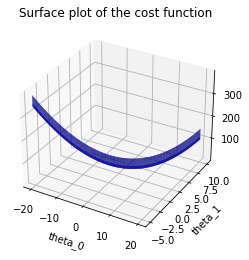

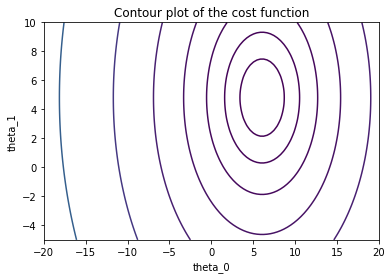

In [55]:
plot_J(X, y)

Відображення знайденої апроксимації разом із тренувальними даними.

[6.07677438 4.81518298]


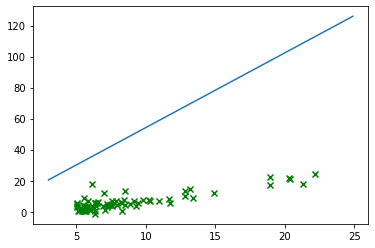

In [56]:
x = np.arange(3, 25, 0.1)
print(new_theta)
h = new_theta[0] + new_theta[1]*x
plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [57]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_proc = (X_test.copy() - mean) / std

X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'X' : X_test, 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred          err
23   6.3261   5.18750   3.632463    29.976610
70  10.1360   6.67990   8.045104    20.437495
74   5.0269  -2.68070   2.127725   179.371990
5    8.3829  11.88600   6.014657    49.397131
57   5.6397   4.60420   2.837472    38.372090
30   5.2524  -1.22000   2.388900   295.811467
32   9.2482  12.13400   7.016851    42.171989
4    5.8598   6.82330   3.092393    54.678925
15   5.3794   3.51290   2.535992    27.809166
61   5.1793  -0.74279   2.304235   410.213546
96   5.4369   0.61705   2.602589   321.779193
79   5.1077   2.05760   2.221308     7.956250
75   6.5479   0.29678   3.889353  1210.517214
91   7.6366   4.29590   5.150290    19.888487
36   8.0959   4.11640   5.682253    38.039368
7    8.5781  12.00000   6.240738    47.993846
8    6.4862   6.59870   3.817892    42.141758
54   6.3328   1.42330   3.640223   155.759386
11  14.1640  15.50500  12.710349    18.024190
19   7.0708   5.38930   4.494978    16.594404
5.071221552564351
5.07122155256435